In [4]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import os

In [5]:
# Set constants
BATCH_SIZE = 16
IMAGE_SIZE = 224
CHANNELS = 3
EPOCHS = 10

In [6]:

# Load the dataset
def load_dataset(directory):
    dataset = tf.keras.preprocessing.image_dataset_from_directory(
        directory,
        seed=123,
        shuffle=True,
        image_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=BATCH_SIZE
    )
    return dataset

train_directory = r"C:\\Users\\Dilina Fernando\\Downloads\\archive (24)\\tomato\\train"
val_directory = r"C:\\Users\\Dilina Fernando\\Downloads\\archive (24)\\tomato\\val"

train_dataset = load_dataset(train_directory)
val_dataset = load_dataset(val_directory)

class_names = train_dataset.class_names
print("Class names:", class_names)












Found 10000 files belonging to 10 classes.
Found 5484 files belonging to 10 classes.
Class names: ['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


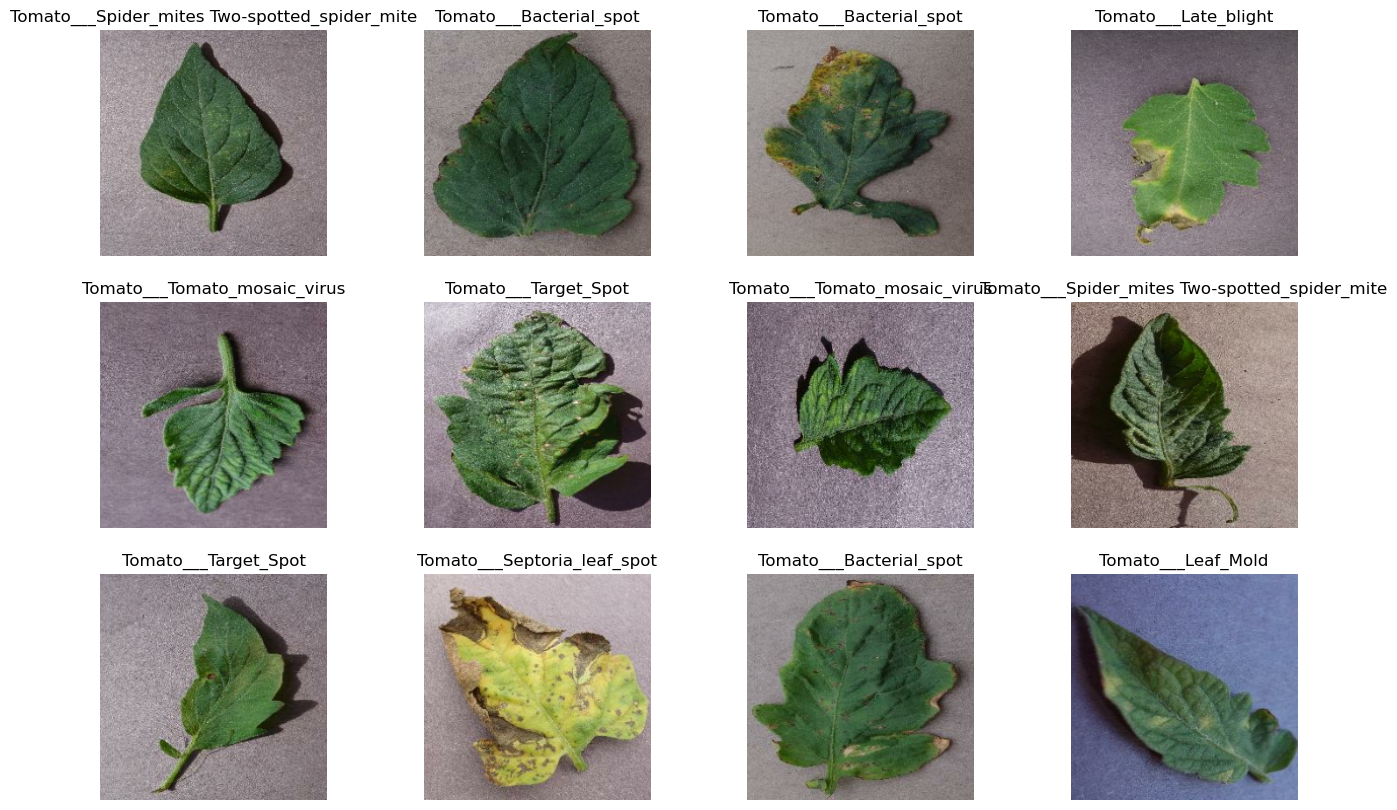

In [7]:
# Visualize the dataset
for image_batch, labels_batch in train_dataset.take(1):
    plt.figure(figsize=(16, 10))
    for i in range(min(12, len(image_batch))):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")
    plt.show()

In [8]:
# Prefetch data for performance
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.prefetch(buffer_size=AUTOTUNE)


In [9]:
# Build the model
def create_model():
    model = models.Sequential([
        layers.InputLayer(input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(len(class_names), activation='softmax')
    ])
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

model = create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 26, 26, 128)     

In [10]:
# Train the model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=EPOCHS
)

Epoch 1/10
625/625 [==============================] - 989s 2s/step - loss: 5.1252 - accuracy: 0.2123 - val_loss: 1.9583 - val_accuracy: 0.3771
Epoch 2/10
625/625 [==============================] - 865s 1s/step - loss: 1.7246 - accuracy: 0.4061 - val_loss: 1.2688 - val_accuracy: 0.5799
Epoch 3/10
625/625 [==============================] - 563s 900ms/step - loss: 1.1810 - accuracy: 0.6020 - val_loss: 1.0809 - val_accuracy: 0.6765
Epoch 4/10
625/625 [==============================] - 569s 910ms/step - loss: 0.8306 - accuracy: 0.7303 - val_loss: 0.7587 - val_accuracy: 0.7972
Epoch 5/10
625/625 [==============================] - 574s 918ms/step - loss: 0.5373 - accuracy: 0.8250 - val_loss: 0.6395 - val_accuracy: 0.8501
Epoch 6/10
625/625 [==============================] - 606s 970ms/step - loss: 0.3821 - accuracy: 0.8795 - val_loss: 0.6323 - val_accuracy: 0.8671
Epoch 7/10
625/625 [==============================] - 596s 954ms/step - loss: 0.3476 - accuracy: 0.8977 - val_loss: 0.7622 - val_a

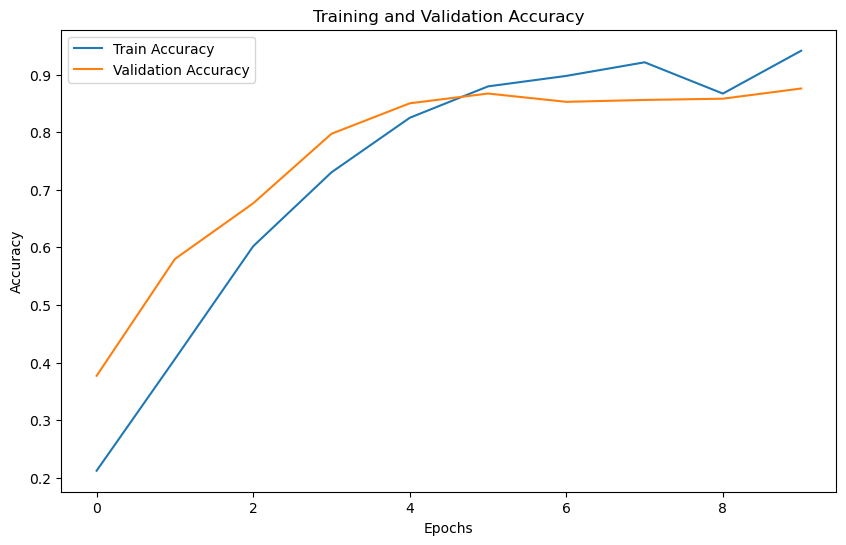

In [11]:
# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

Found 5484 files belonging to 10 classes.
1/1 [==============================] - 0s 116ms/step


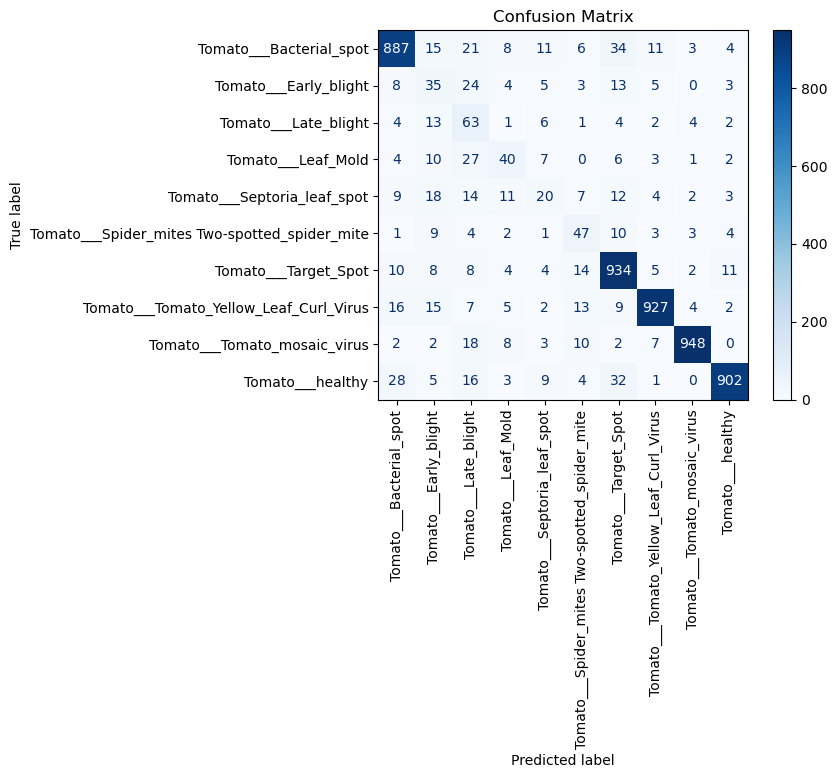

In [12]:
# Evaluate the model
def evaluate_model(model, val_directory):
    test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
        val_directory,
        image_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        shuffle=False
    )

    y_true = []
    y_pred = []

    for images, labels in test_dataset:
        predictions = model.predict(images)
        y_true.extend(labels.numpy())
        y_pred.extend(np.argmax(predictions, axis=1))

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    cm = confusion_matrix(y_true, y_pred, labels=range(len(class_names)))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
    plt.title("Confusion Matrix")
    plt.show()

evaluate_model(model, val_directory)


In [13]:
import os

# Get all directories in "../models"
directory_path = r"C:\Users\Dilina Fernando\Downloads\archive (24)\tomato\new_model_12"


# Save the model
model.save(os.path.join(directory_path, "tomato.h5"))